<a href="https://colab.research.google.com/github/liuxiao916/Dive_into_DL_PyTorch/blob/main/3.2%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E7%9A%84%E4%BB%8E%E9%9B%B6%E5%BC%80%E5%A7%8B%E5%AE%9E%E7%8E%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 线性回归的从零开始实现

In [48]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
import torch

## 3.2.1 生成数据集

In [49]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(scale = 1,size=(num_examples,num_inputs)))
labels = true_w[0]*features[:,0] + true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(scale = 0.01,size = labels.shape))

In [50]:
features[0],labels[0]

(tensor([ 0.9952, -1.4947], dtype=torch.float64),
 tensor(11.2673, dtype=torch.float64))

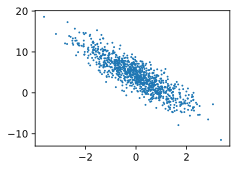

In [55]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    #设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1);

## 3.2.2 读取数据集


In [65]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = np.array(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0, torch.tensor(j)), labels.index_select(0, torch.tensor(j)) #take函数根据索引返回对于元素

In [66]:
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X,y)
    break

tensor([[-0.3573,  0.9472],
        [ 0.2406, -0.9822],
        [-0.4839,  0.0097],
        [-0.0543,  0.2072],
        [ 0.7423, -0.6634],
        [ 0.3089,  0.3380],
        [ 1.7025,  1.2593],
        [-0.7182,  0.5989],
        [ 1.3530,  0.2189],
        [-0.0947,  0.2972]], dtype=torch.float64) tensor([0.2517, 8.0007, 3.1983, 3.3857, 7.9343, 3.6755, 3.3202, 0.7386, 6.1635,
        2.9879], dtype=torch.float64)
